<a href="https://colab.research.google.com/github/ryu-jihye/Use-Public-information/blob/main/%EA%B0%80%EA%B2%8C%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,104 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144865 files and d

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rc("axes", unicode_minus=False)

In [ ]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

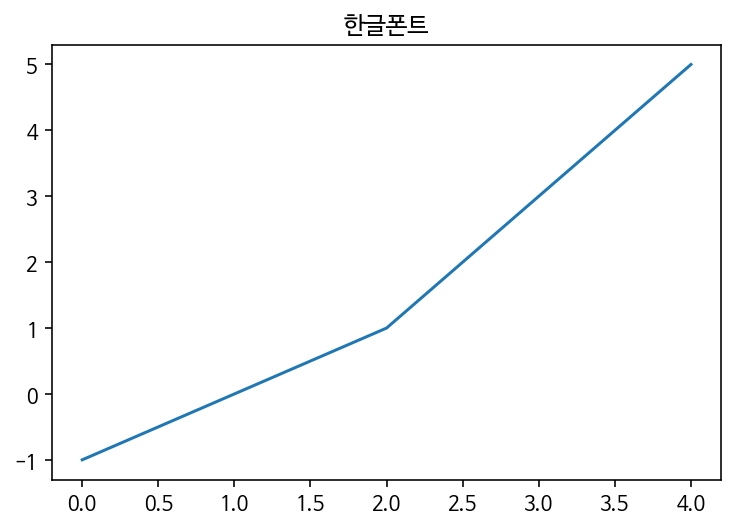

In [ ]:
pd.Series([-1, 0, 1, 3, 5]).plot(title="한글폰트")

# 구글 드라이브 파일 갖고 오기

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
'/content/gdrive/My Drive/상가업소정보_201912_01.csv'

'/content/gdrive/My Drive/상가업소정보_201912_01.csv'

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/상가업소정보_201912_01.csv", sep='|')
df.shape

(573680, 39)

In [ ]:
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11680,강남구,1168060000,대치1동,1168010600,대치동,1168010600206040000,1,대지,604,NaN,서울특별시 강남구 대치동 604,116802000003,서울특별시 강남구 남부순환로,2933,NaN,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,11,서울특별시,11680,강남구,1168064000,역삼1동,1168010100,역삼동,1168010100206960042,1,대지,696,42.0,서울특별시 강남구 역삼동 696-42,116804166502,서울특별시 강남구 선릉로93길,6,NaN,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11545,금천구,1154563000,독산3동,1154510200,독산동,1154510200201620001,1,대지,162,1.0,서울특별시 금천구 독산동 162-1,115453117003,서울특별시 금천구 가산로,34,6.0,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,"피자, 햄버거, 샌드위치 및 유사 음식점업",26,부산광역시,26530,사상구,2653062000,괘법동,2653010400,괘법동,2653010400205780000,1,대지,578,NaN,부산광역시 사상구 괘법동 578,265303139004,부산광역시 사상구 괘감로,37,NaN,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,욕탕업,11,서울특별시,11710,송파구,1171060000,석촌동,1171010500,석촌동,1171010500202560000,1,대지,256,NaN,서울특별시 송파구 석촌동 256,117103123001,서울특별시 송파구 가락로,71,NaN,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

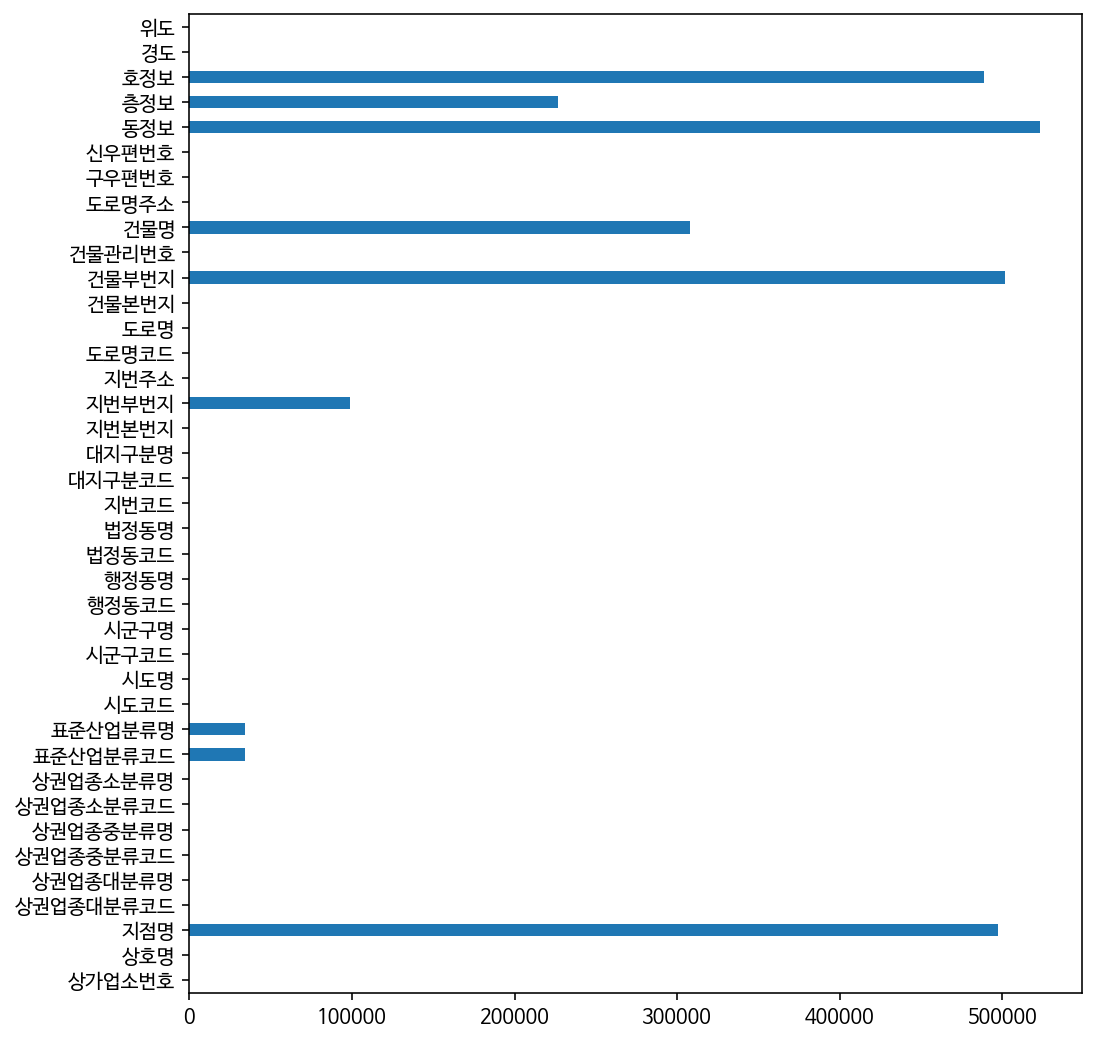

In [ ]:
df.isnull().sum().plot.barh(figsize=(8, 9))

In [ ]:
columns= ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']
df = df[columns].copy()
df.shape

(573680, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   도로명주소     573680 non-null  object 
 9   경도        573680 non-null  float64
 10  위도        573680 non-null  float64
dtypes: float64(2), object(9)
memory usage: 48.1+ MB


In [ ]:
df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape

(407376, 11)

In [ ]:
df_seoul["상호명_소문자"] = df_seoul["상호명"].str.lower()

In [ ]:
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("이디야|이디아|ediya"), "상호명_소문자"].shape

(543,)

In [ ]:
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("스타벅스|starbucks"), "상호명_소문자"].shape

(506,)

In [ ]:
df_cafe = df_seoul[
    df_seoul["상호명_소문자"].str.contains('스타벅스|starbucks|이디야|이디아|ediya')].copy()
#df_cafe = df_seoul[df_seoul["상호명_소문자"].str.contains('스타벅스|starbucks|이디야|이디아|ediya').copy()
df_cafe.shape

(1049, 12)

In [ ]:
df_cafe.loc[df_cafe["상호명_소문자"].str.contains('스타벅스|starbucks'), "브랜드명"] = "스타벅스"
df_cafe.loc[~df_cafe["상호명_소문자"].str.contains('스타벅스|starbucks'), "브랜드명"] = "이디야"
df_cafe[["상호명_소문자", "브랜드명"]].head()

,상호명_소문자,브랜드명
1104,스타벅스,스타벅스
1675,이디야커피,이디야
2023,스타벅스종로3가점,스타벅스
2770,스타벅스,스타벅스
2957,이디야커피,이디야


In [ ]:
df_cafe[["상호명", "브랜드명"]].tail()

,상호명,브랜드명
567090,스타벅스,스타벅스
567828,스타벅스,스타벅스
568636,이디야커피,이디야
570096,스타벅스,스타벅스
571052,스타벅스,스타벅스


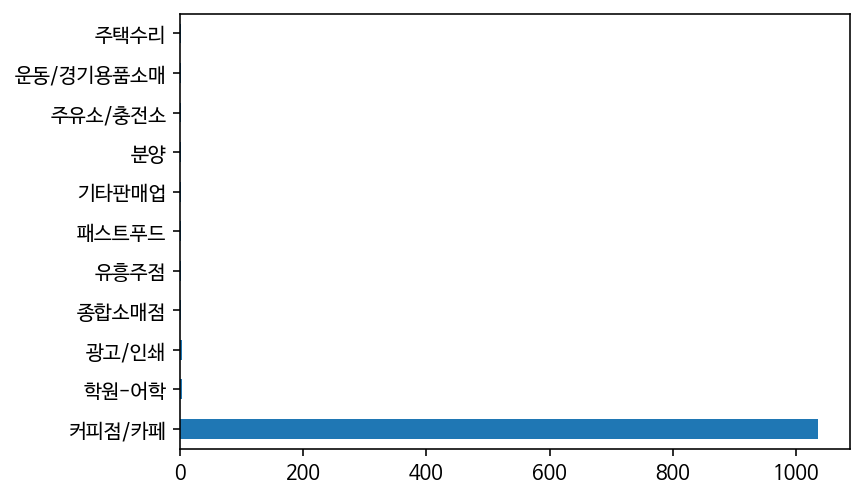

In [ ]:
df_cafe["상권업종중분류명"].value_counts().plot.barh()

In [ ]:
print(df_cafe.shape)
df_cafe = df_cafe[df_cafe["상권업종중분류명"] == "커피점/카페"].copy()
df_cafe.shape

(1049, 13)


(1036, 13)

In [ ]:
df_cafe["브랜드명"].value_counts()

이디야     532
스타벅스    504
Name: 브랜드명, dtype: int64

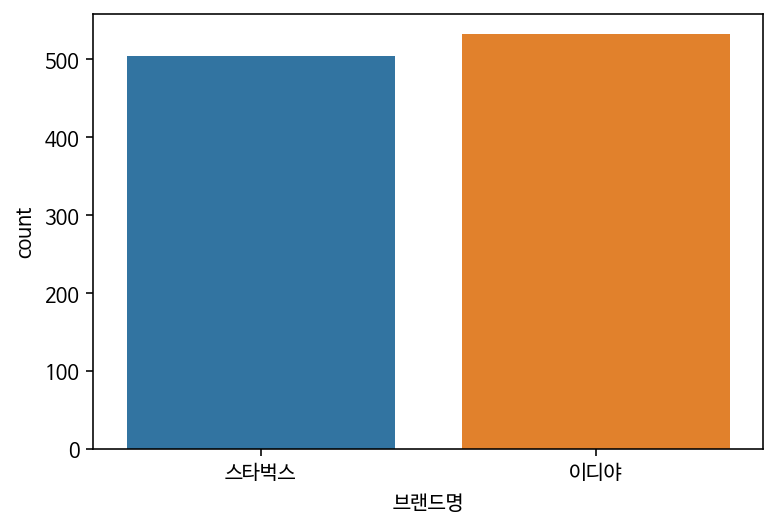

In [ ]:
sns.countplot(data=df_cafe,x="브랜드명")

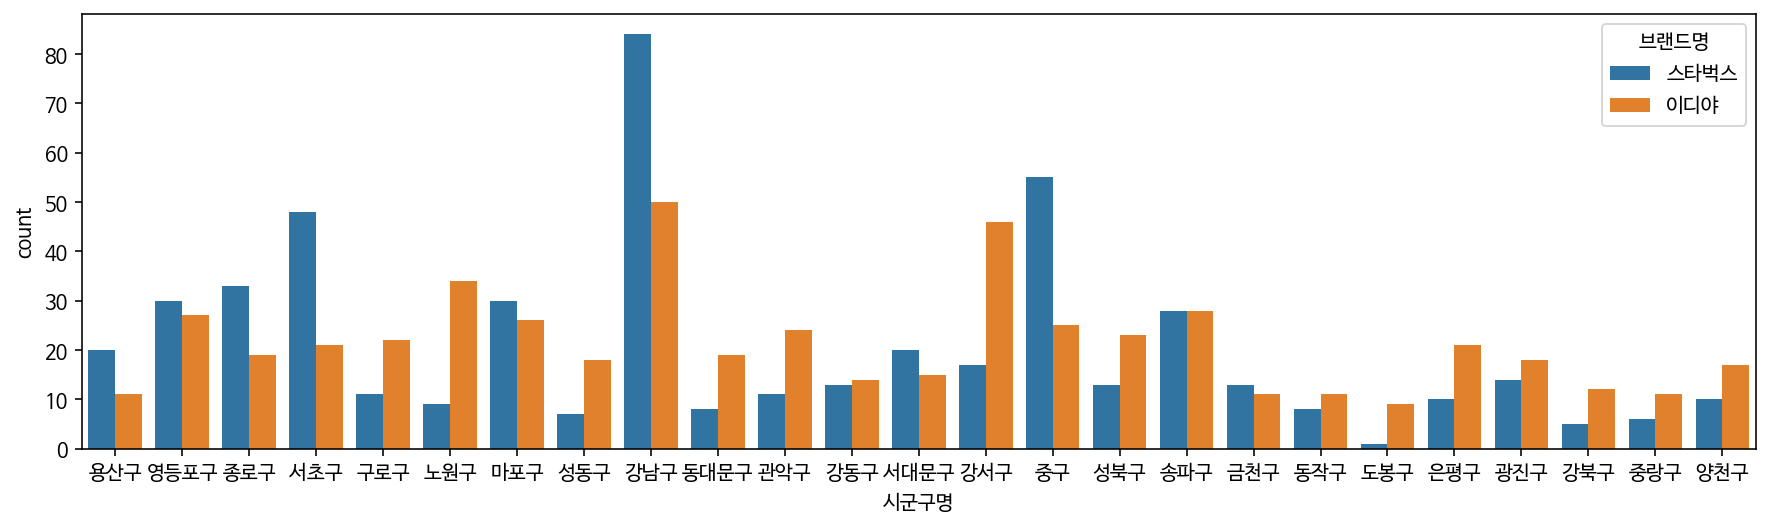

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_cafe,x="시군구명", hue="브랜드명")

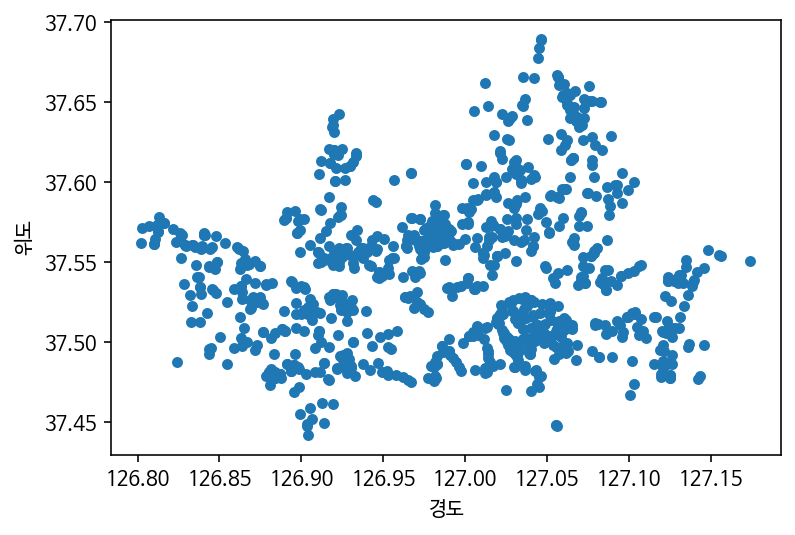

In [ ]:
df_cafe[["위도", "경도"]].plot.scatter(x="경도", y="위도")

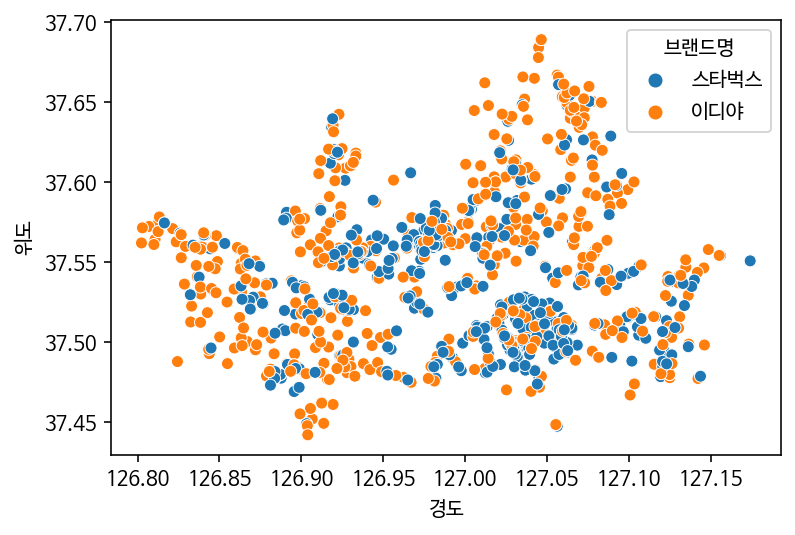

In [ ]:
sns.scatterplot(data=df_cafe, x="경도", y="위도", hue="브랜드명")

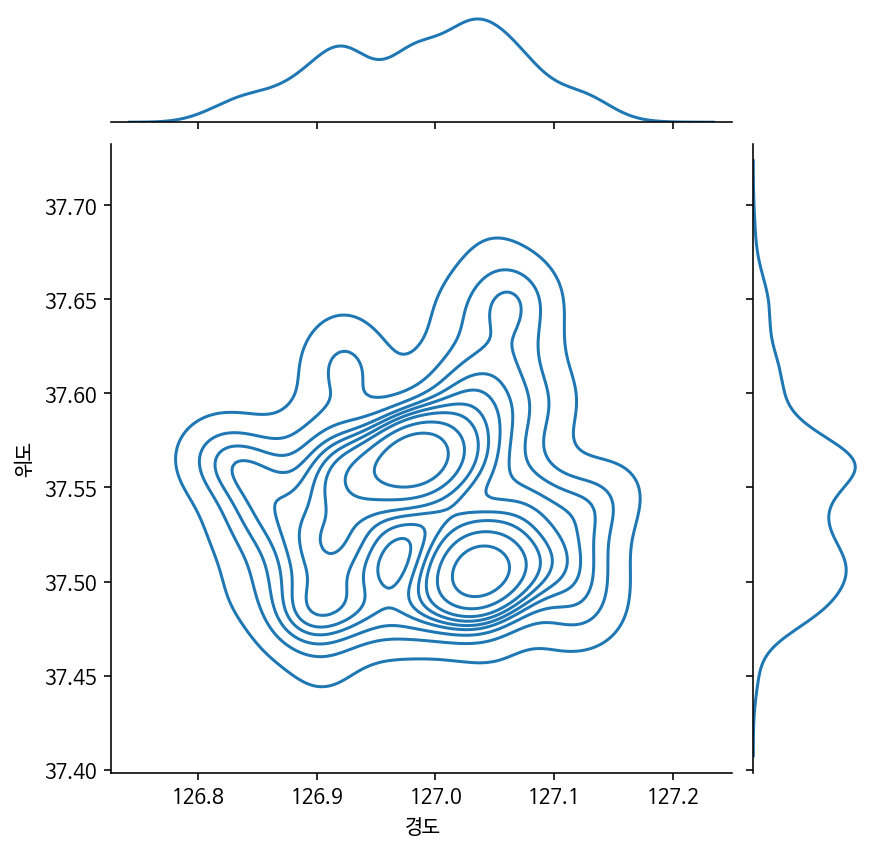

In [ ]:
sns.jointplot(data=df_cafe, x="경도", y="위도", kind="kde")

In [ ]:
df_cafe_vs = df_cafe.groupby(["시군구명", "브랜드명"])["상호명"].count()
df_cafe_vs.head()

시군구명  브랜드명
강남구   스타벅스    84
      이디야     50
강동구   스타벅스    13
      이디야     14
강북구   스타벅스     5
Name: 상호명, dtype: int64

In [ ]:
df_cafe_vs.reset_index().head()

,시군구명,브랜드명,상호명
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5


In [ ]:
df_cafe_vs.to_frame().head()

상호명
시군구명 브랜드명     
강남구  스타벅스   84
     이디야    50
강동구  스타벅스   13
     이디야    14
강북구  스타벅스    5

In [ ]:
df_cafe_vs = df_cafe_vs.reset_index()
df_cafe_vs.head()

,시군구명,브랜드명,상호명
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5


In [ ]:
df_cafe_vs.columns = ['구', '브랜드명', '매장수']
df_cafe_vs.head()

,구,브랜드명,매장수
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5


In [ ]:
# pivot -> 연산 불가
pivot = pd.pivot_table(data=df_cafe, index=["시군구명", "브랜드명"], values="상호명", aggfunc="count")
# values="상호명", aggfunc="count" -> 상호명은 숫자가 아니므로 agg=count 필요
pivot.head()

상호명
시군구명 브랜드명     
강남구  스타벅스   84
     이디야    50
강동구  스타벅스   13
     이디야    14
강북구  스타벅스    5

In [ ]:
pivot.loc["강남구"]

,상호명
브랜드명,
스타벅스,84
이디야,50


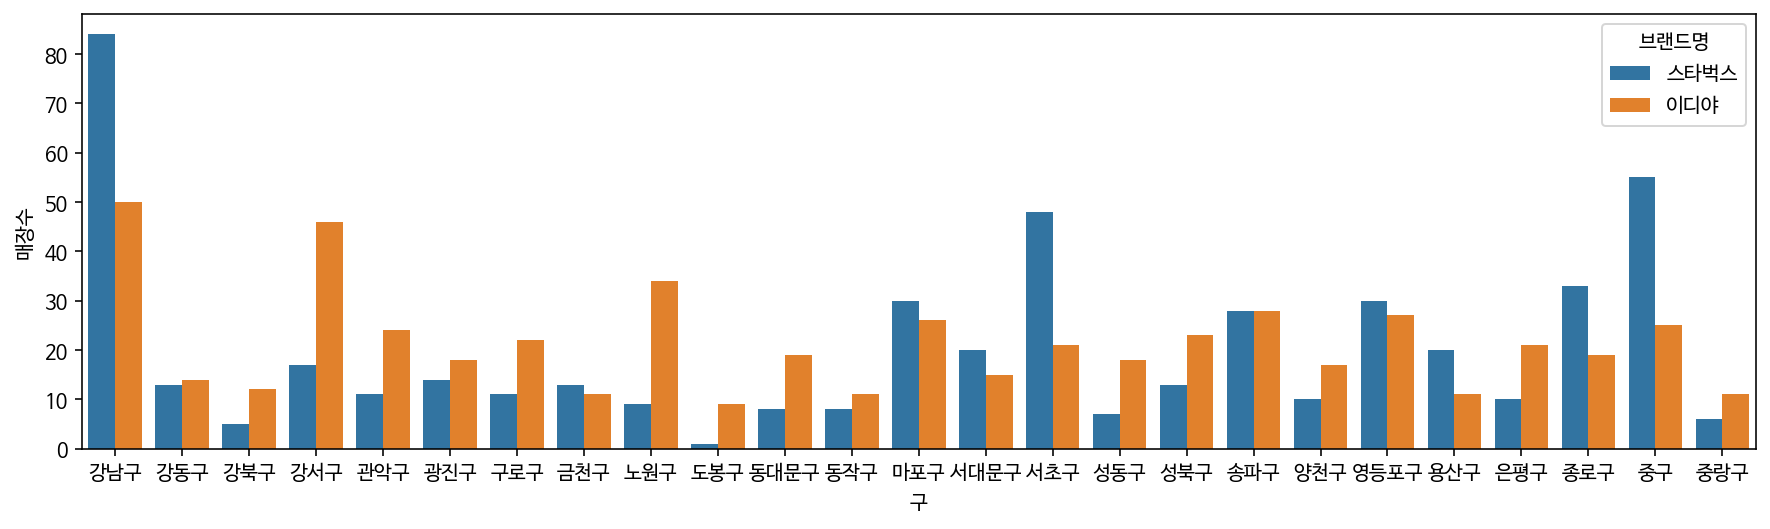

In [ ]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df_cafe_vs, x="구", y="매장수", hue="브랜드명")

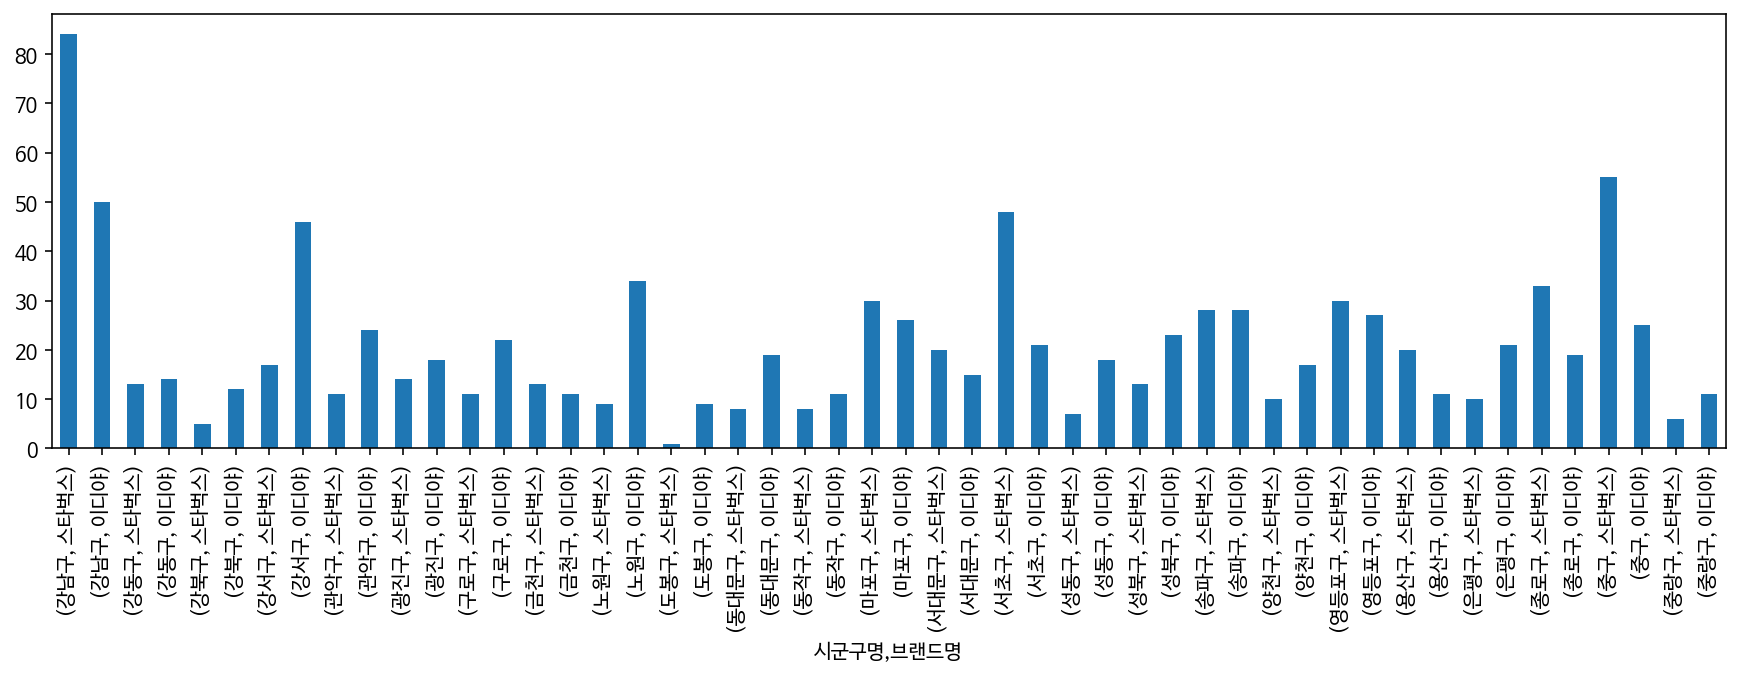

In [ ]:
group = df_cafe.groupby(["시군구명", "브랜드명"])["상호명"].count()
group.plot.bar(figsize=(15, 4))

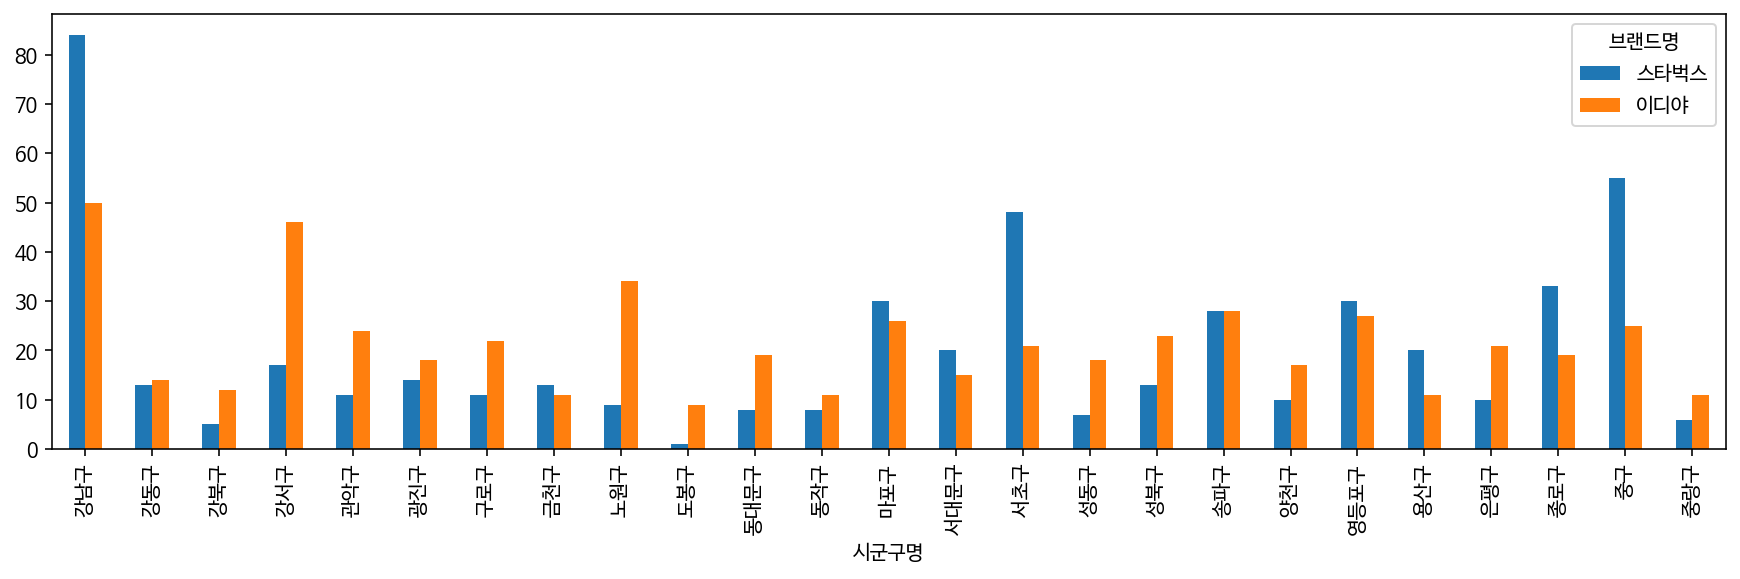

In [ ]:
group.unstack().plot.bar(figsize=(15, 4))

In [ ]:
#pivot.unstack().plot.bar()
pivot = pd.pivot_table(data=df_cafe, index="시군구명",
                       columns="브랜드명", values="상호명", 
                       aggfunc="count")

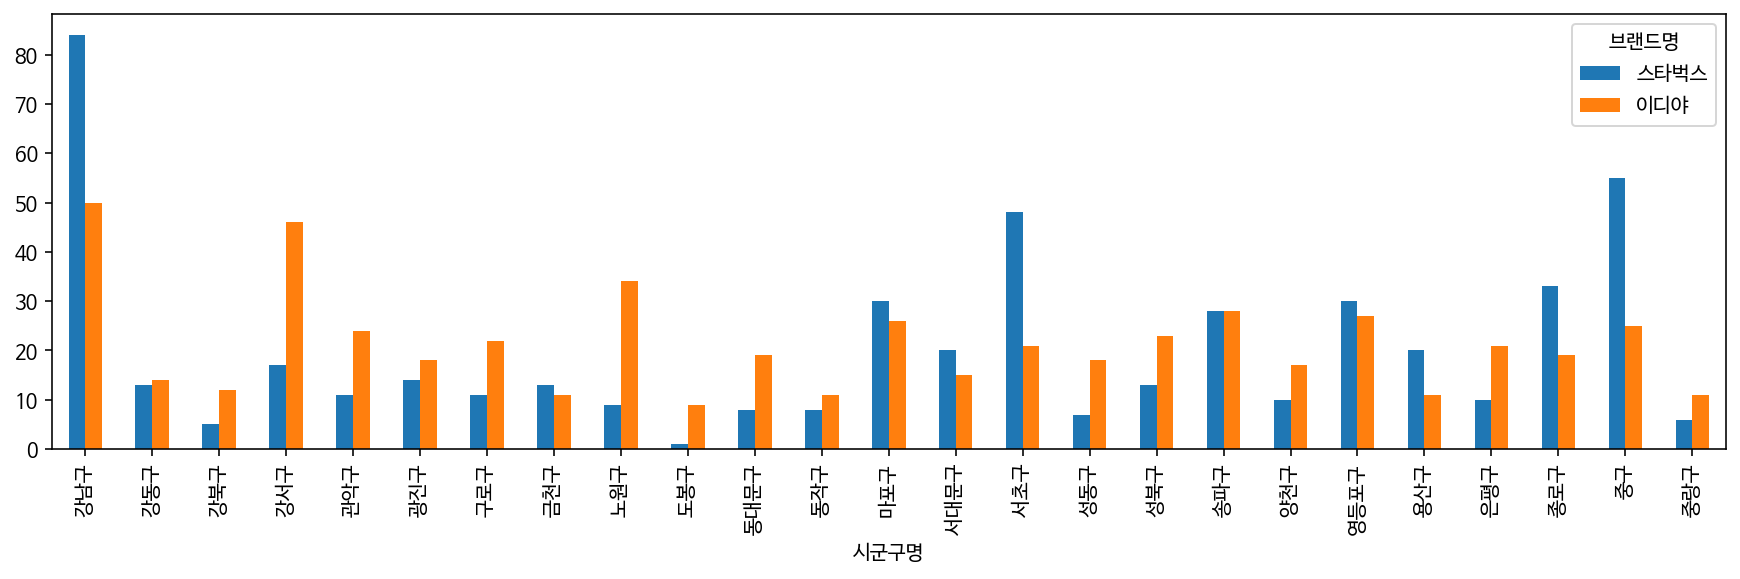

In [ ]:
pivot.plot.bar(figsize=(15, 4))

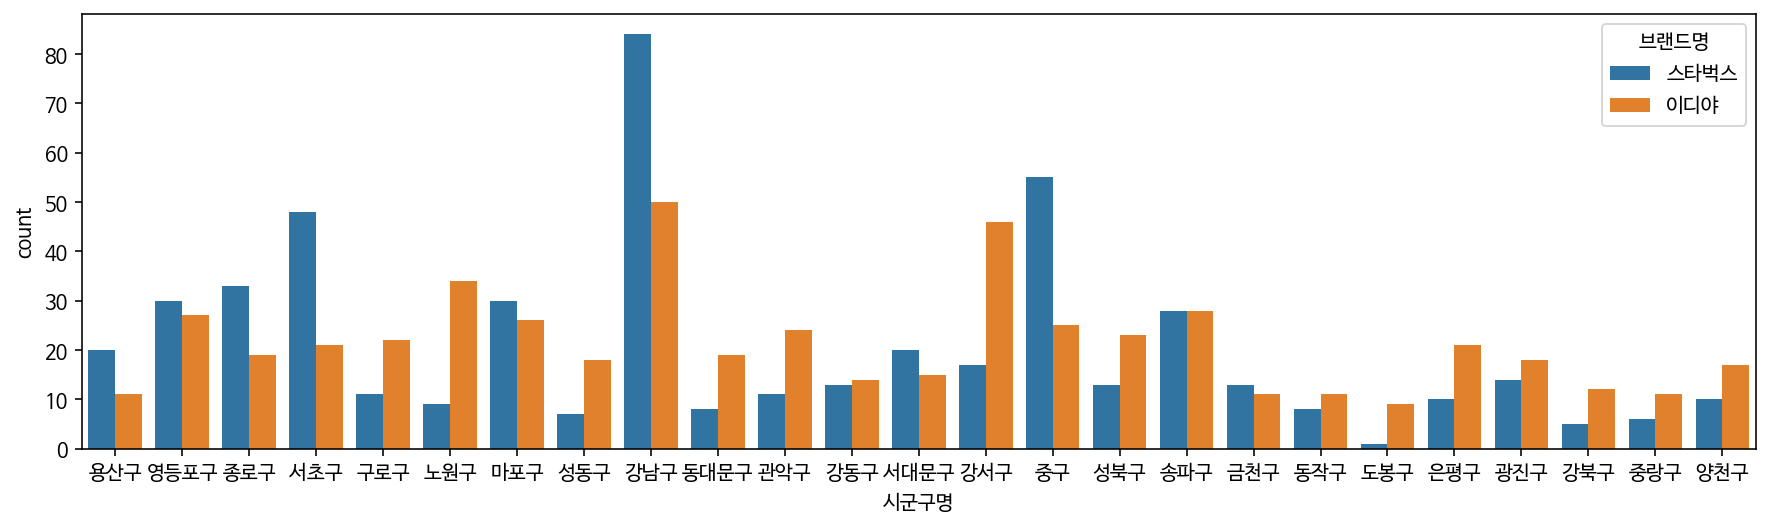

In [ ]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df_cafe, x="시군구명", hue="브랜드명")

In [ ]:
import folium

In [ ]:
#folium.Map([,])
lat = df_cafe["위도"].mean()
long = df_cafe["경도"].mean()
lat, long

(37.5429213982126, 126.9887885123524)

In [ ]:
m = folium.Map([lat, long], zoom_start=12, tiles="Stamen Toner")
for i in df_cafe.index:
  sub_lat = df_cafe.loc[i, "위도"]
  sub_long = df_cafe.loc[i, "경도"]

  title = df_cafe.loc[i, "상호명"] + "-" + df_cafe.loc[i, "도로명주소"]
  #title =f"{df_cafe.loc[i, '상호명']} - {df_cafe.loc[i, '도로명주소']} -> 같은 방식 표시
  
  color = "green"
  if df_cafe.loc[i, "브랜드명"] == "이디야":
      color = "blue"

  folium.CircleMarker([sub_lat, sub_long], 
                      radius = 3,
                      color=color,
                          tooltip=title).add_to(m)

m

In [ ]:
geo_path = 'sample_data/seoul_municipalities_geo_simple.json'

import json
geo_json = json.load(open(geo_path, encoding="utf-8"))
geo_json["features"][0]["properties"]

{'base_year': '2013',
 'code': '11250',
 'name': '강동구',
 'name_eng': 'Gangdong-gu'}

In [ ]:
df_star = df_cafe_vs[df_cafe_vs["브랜드명"] == "스타벅스"].copy()
df_star.head()

,구,브랜드명,매장수
0,강남구,스타벅스,84
2,강동구,스타벅스,13
4,강북구,스타벅스,5
6,강서구,스타벅스,17
8,관악구,스타벅스,11


In [ ]:
geo_json["features"][0]['properties']['name']

'강동구'

In [ ]:
m = folium.Map([lat, long])

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_star,
    columns=['구', '매장수'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='스타벅스 매장수'
).add_to(m)

m

In [ ]:
df_ediya = df_cafe_vs[df_cafe_vs["브랜드명"] == "이디야"].copy()
df_ediya.head()

,구,브랜드명,매장수
1,강남구,이디야,50
3,강동구,이디야,14
5,강북구,이디야,12
7,강서구,이디야,46
9,관악구,이디야,24


In [ ]:
m = folium.Map([lat, long], tiles='stamen toner')

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_ediya,
    columns=['구', '매장수'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='이디야 매장수'
).add_to(m)


for i in df_cafe.index:
  sub_lat = df_cafe.loc[i, "위도"]
  sub_long = df_cafe.loc[i, "경도"]

  title = df_cafe.loc[i, "상호명"] + "-" + df_cafe.loc[i, "도로명주소"]
  
  color = "green"
  if df_cafe.loc[i, "브랜드명"] == "이디야":
      color = "blue"

  folium.CircleMarker([sub_lat, sub_long], 
                      radius = 3,
                      color=color,
                          tooltip=title).add_to(m)

m

In [ ]:
df_vs = df_cafe_vs.pivot(index="구", columns="브랜드명", values="매장수")
df_vs["매장수비교"] = df_vs["스타벅스"] - df_vs["이디야"] > 0
df_vs.head()

브랜드명,스타벅스,이디야,매장수비교
구,,,
강남구,84,50,True
강동구,13,14,False
강북구,5,12,False
강서구,17,46,False
관악구,11,24,False


In [ ]:
df_vs["매장수비교"].astype(float)

구
강남구     1.0
강동구     0.0
강북구     0.0
강서구     0.0
관악구     0.0
광진구     0.0
구로구     0.0
금천구     1.0
노원구     0.0
도봉구     0.0
동대문구    0.0
동작구     0.0
마포구     1.0
서대문구    1.0
서초구     1.0
성동구     0.0
성북구     0.0
송파구     0.0
양천구     0.0
영등포구    1.0
용산구     1.0
은평구     0.0
종로구     1.0
중구      1.0
중랑구     0.0
Name: 매장수비교, dtype: float64

In [ ]:
df_vs = df_vs.reset_index()
df_vs.head()

브랜드명,구,스타벅스,이디야,매장수비교
0,강남구,84,50,True
1,강동구,13,14,False
2,강북구,5,12,False
3,강서구,17,46,False
4,관악구,11,24,False


In [ ]:
for i in df_vs.index:
  print(df_vs.loc[i, "구"])

강남구
강동구
강북구
강서구
관악구
광진구
구로구
금천구
노원구
도봉구
동대문구
동작구
마포구
서대문구
서초구
성동구
성북구
송파구
양천구
영등포구
용산구
은평구
종로구
중구
중랑구


In [ ]:
df_vs = df_cafe_vs.pivot(index="구", columns="브랜드명", values="매장수")
df_vs["매장수비교"] = df_vs["스타벅스"] - df_vs["이디야"] > 0
df_vs.head()

브랜드명,스타벅스,이디야,매장수비교
구,,,
강남구,84,50,True
강동구,13,14,False
강북구,5,12,False
강서구,17,46,False
관악구,11,24,False


In [ ]:
m = folium.Map([lat, long], tiles='stamen toner')

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_vs,
    columns=['시군구명', '매장수비교'],
    key_on='feature.properties.name',
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='매장수 비교'
).add_to(m)

m

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


In [ ]:
df_gu_mean =  df_cafe.pivot_table(index="시군구명", values=["경도", "위도"], aggfunc="mean")
df_gu_mean = df_gu_mean.reset_index()
df_gu_mean.head()

,시군구명,경도,위도
0,강남구,127.046129,37.505744
1,강동구,127.135417,37.540316
2,강북구,127.022897,37.631146
3,강서구,126.837883,37.555966
4,관악구,126.935210,37.482054


In [ ]:
# how = outer : 모든 옵션 적용
df_vs = df_vs.merge(df_gu_mean, how='inner', left_on="구", right_on="시군구명")
df_vs.head()

,스타벅스,이디야,매장수비교,시군구명,경도,위도
0,84,50,True,강남구,127.046129,37.505744
1,13,14,False,강동구,127.135417,37.540316
2,5,12,False,강북구,127.022897,37.631146
3,17,46,False,강서구,126.837883,37.555966
4,11,24,False,관악구,126.935210,37.482054


In [ ]:
for i in df_vs.index:
    sub_long = df_vs.loc[i, "경도"]
    sub_lat = df_vs.loc[i, "위도"]
    
    print(df_vs.loc[i, "시군구명"], sub_lat, sub_long)

강남구 37.50574379723647 127.04612924851477
강동구 37.54031612892801 127.13541705768304
강북구 37.63114579912596 127.02289728220342
강서구 37.555966339807725 126.8378831992901
관악구 37.482054429288624 126.93521011850088
광진구 37.54376971811047 127.08329747837426
구로구 37.494060747742985 126.87745596750014
금천구 37.469286927652114 126.8921962213389
노원구 37.6423933051354 127.06717137772726
도봉구 37.66576544822702 127.04047354226732
동대문구 37.580700635471146 127.05492813212528
동작구 37.49570035386574 126.94890217041826
마포구 37.55548154197544 126.92300493503947
서대문구 37.566284229288875 126.93762476470604
서초구 37.49301091104672 127.01402160112261
성동구 37.55457943854072 127.03635911128876
성북구 37.59886024576222 127.02565170180024
송파구 37.50117991460961 127.1141353230951
양천구 37.52891847594384 126.86196683493064
영등포구 37.520781009585264 126.91390000535677
용산구 37.53468952777027 126.98251254628539
은평구 37.61406806596294 126.92041650466946
종로구 37.57615434804085 126.98723628325011
중구 37.56289726978085 126.98657335073601
중랑구 37.5960

In [ ]:
df_vs.head(1)

,스타벅스,이디야,매장수비교,시군구명,경도,위도
0,84,50,True,강남구,127.046129,37.505744


In [ ]:
m = folium.Map([lat, long], zoom_start=11, tiles='stamen toner')

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_vs,
    columns=['시군구명', '매장수비교'],
    key_on='feature.properties.name',
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='매장수 비교'
).add_to(m)


for i in df_vs.index:
    sub_long = df_vs.loc[i, "경도"]
    sub_lat = df_vs.loc[i, "위도"]
    
    cafes = ["스타벅스", "이디야"]
    for cafe in cafes:
        cafe_count = df_vs.loc[i, cafe]
        
        gu = df_vs.loc[i, "시군구명"]
        tooltip = f"{gu} {cafe} : {cafe_count}"
        
        radius = np.sqrt(cafe_count) * 3
        
        if cafe == "이디야":
            color = "blue"
            sub_long = sub_long + 0.01
        else:
            color = "green"
            
            
        folium.CircleMarker([sub_lat, sub_long],
                            radius=radius,
                            color=color,
                            fill=True,
                            tooltip=tooltip,
                           ).add_to(m)
m

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
